In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import display, Markdown

In [2]:
"""Part One: Exploring Data and Testing Hypotheses: Uncovering Insights from Dataset"""

### Task1: Data Preparation and Exploration

## Data Exploration

# Displaying the first few rows of the DataFrame, Basic information, Shape and Description of the Dataset

employee_data = pd.read_csv("Employee_performance.csv")

display(Markdown("**---First few rows---**"))
print(employee_data.head())

display(Markdown("**---Dataset basic information---**"))
print(employee_data.info())

**---First few rows---**

   EmployeeID Department  Gender  Experience  TrainingHours  \
0        1001         IT    Male           4              5   
1        1002  Marketing  Female           0             50   
2        1003      Sales    Male           0              5   
3        1004         HR    Male           1              5   
4        1005         HR  Female           9              5   

   PerformanceRating  Salary  
0               1.00   19000  
1               5.50    6900  
2               1.00    6000  
3               1.00    6000  
4               1.04   38000  


**---Dataset basic information---**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EmployeeID         1468 non-null   int64  
 1   Department         1468 non-null   object 
 2   Gender             1468 non-null   object 
 3   Experience         1468 non-null   int64  
 4   TrainingHours      1468 non-null   int64  
 5   PerformanceRating  1468 non-null   float64
 6   Salary             1468 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 80.4+ KB
None


In [3]:
display(Markdown("**---Dataset Shape---**"))
print(employee_data.shape)

**---Dataset Shape---**

(1468, 7)


In [4]:
display(Markdown("**---Dataset Null Check---**"))
print(employee_data.isnull())

**---Dataset Null Check---**

      EmployeeID  Department  Gender  Experience  TrainingHours  \
0          False       False   False       False          False   
1          False       False   False       False          False   
2          False       False   False       False          False   
3          False       False   False       False          False   
4          False       False   False       False          False   
...          ...         ...     ...         ...            ...   
1463       False       False   False       False          False   
1464       False       False   False       False          False   
1465       False       False   False       False          False   
1466       False       False   False       False          False   
1467       False       False   False       False          False   

      PerformanceRating  Salary  
0                 False   False  
1                 False   False  
2                 False   False  
3                 False   False  
4                 False  

In [5]:
display(Markdown("**---Dataset Description---**"))
employee_data.describe()

**---Dataset Description---**

,EmployeeID,Experience,TrainingHours,PerformanceRating,Salary
count,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000
mean,1734.500000,2.838556,32.144414,3.561512,16107.623297
std,423.919411,2.527657,10.106029,1.044987,12158.438481
min,1001.000000,0.000000,5.000000,1.000000,6000.000000
25%,1367.750000,1.000000,25.000000,2.840000,7700.000000
50%,1734.500000,2.000000,31.000000,3.630000,10100.000000
75%,2101.250000,4.000000,39.000000,4.330000,20000.000000
max,2468.000000,9.000000,50.000000,5.500000,53100.000000


In [6]:
# Missing Value and Null Check

display(Markdown("**---Missing Values in each column---**"))
print(employee_data.isnull().sum())
display(Markdown("**---Duplicated Rows---**"))
print(employee_data.duplicated())

**---Missing Values in each column---**

EmployeeID           0
Department           0
Gender               0
Experience           0
TrainingHours        0
PerformanceRating    0
Salary               0
dtype: int64


**---Duplicated Rows---**

0       False
1       False
2       False
3       False
4       False
        ...  
1463    False
1464    False
1465    False
1466    False
1467    False
Length: 1468, dtype: bool


In [7]:
# Adding new Category Column

labels = ["Entry-Level","Junior", "Mid-Level", "Senior"]
bins = [0,2,5,8,float('inf')]
employee_data['Experience-Category'] = pd.cut(employee_data['Experience'], bins=bins, labels=labels, right=False)
display(Markdown("**---Updated DataFrame with ExperienceCategory column---**"))
print(employee_data.info())
print(employee_data.head())

**---Updated DataFrame with ExperienceCategory column---**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   EmployeeID           1468 non-null   int64   
 1   Department           1468 non-null   object  
 2   Gender               1468 non-null   object  
 3   Experience           1468 non-null   int64   
 4   TrainingHours        1468 non-null   int64   
 5   PerformanceRating    1468 non-null   float64 
 6   Salary               1468 non-null   int64   
 7   Experience-Category  1468 non-null   category
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 82.0+ KB
None
   EmployeeID Department  Gender  Experience  TrainingHours  \
0        1001         IT    Male           4              5   
1        1002  Marketing  Female           0             50   
2        1003      Sales    Male           0              5   
3        1004         HR    Male           1       

In [8]:
for col in employee_data.select_dtypes(include=['object','category']).columns:
    print(employee_data[col].value_counts())

Department
IT           720
Sales        445
Marketing    240
HR            63
Name: count, dtype: int64
Gender
Male      883
Female    585
Name: count, dtype: int64
Experience-Category
Entry-Level    647
Junior         501
Mid-Level      208
Senior         112
Name: count, dtype: int64


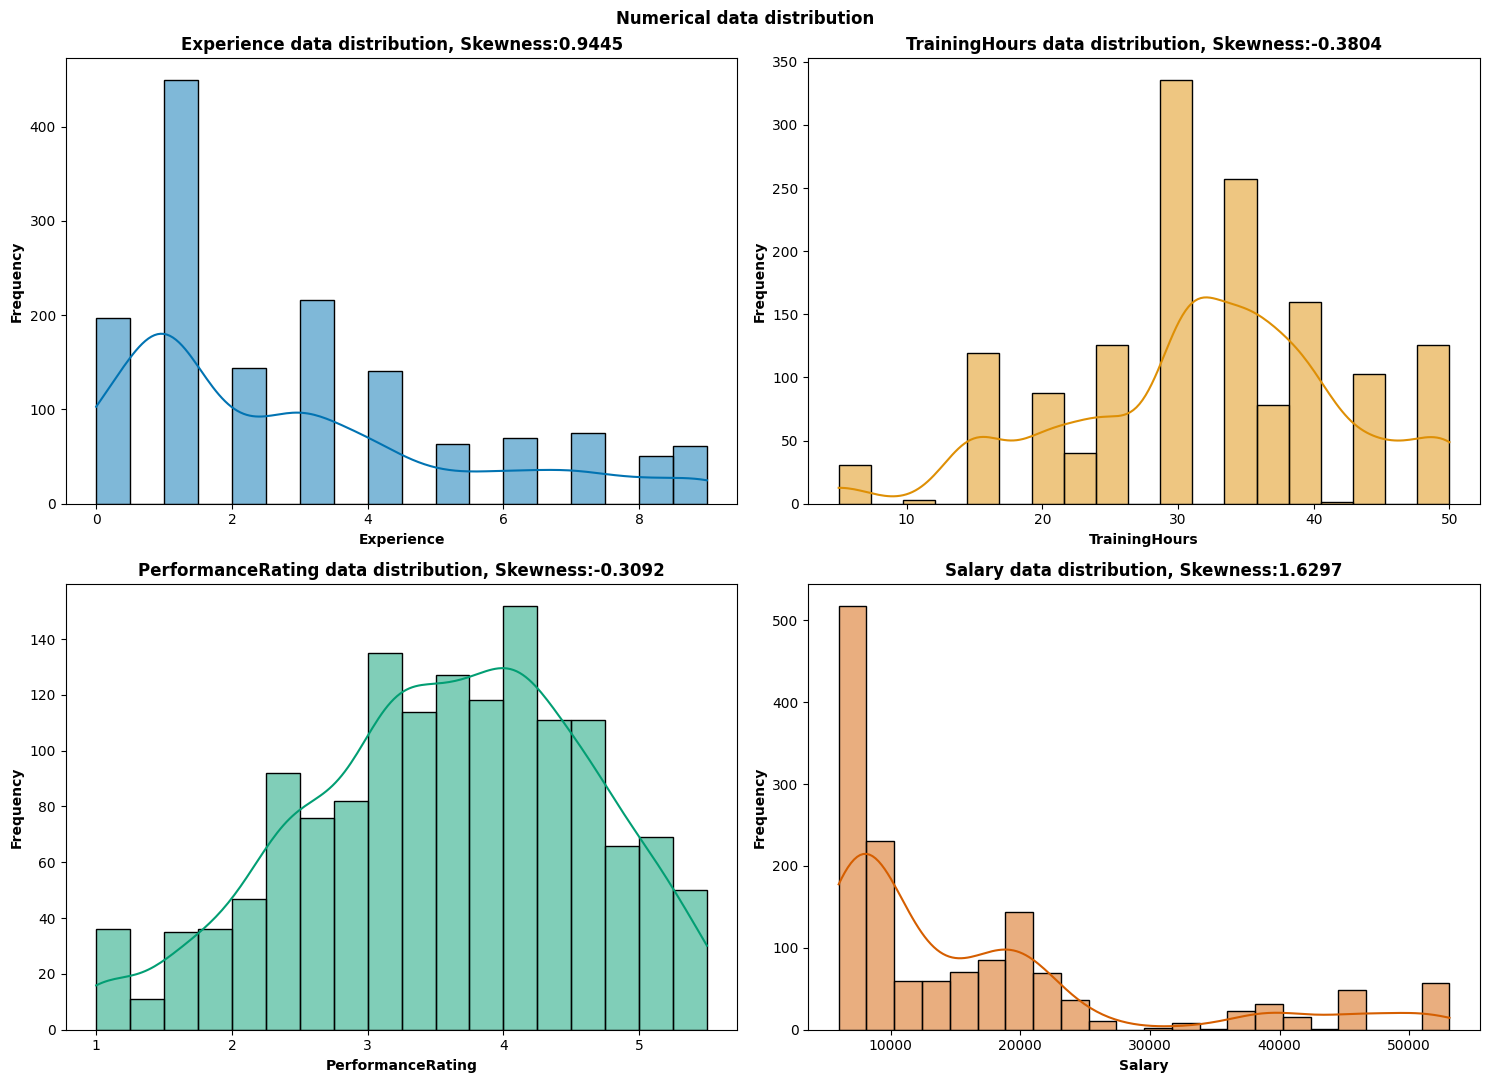

In [9]:
# Numerical Data Distribution
numerical_data = employee_data[['Experience','TrainingHours','PerformanceRating','Salary']].columns.tolist()
fig, axes_array = plt.subplots(2,2,figsize=(15,11))

axes_list = axes_array.flatten()
color_list = sns.color_palette('colorblind',n_colors=len(numerical_data))
for col, ax, color in zip(numerical_data,axes_list,color_list):
    sns.histplot(x=employee_data[col],ax=ax,color=color,kde=True)
    skewness = stats.skew(employee_data[col])
    ax.set_title(f"{col} data distribution, Skewness:{skewness:.4f}", fontweight='bold')
    ax.set_xlabel(col, fontweight='bold')
    ax.set_ylabel("Frequency", fontweight='bold')
    
fig.suptitle("Numerical data distribution", fontweight='bold')
plt.tight_layout()
plt.show()

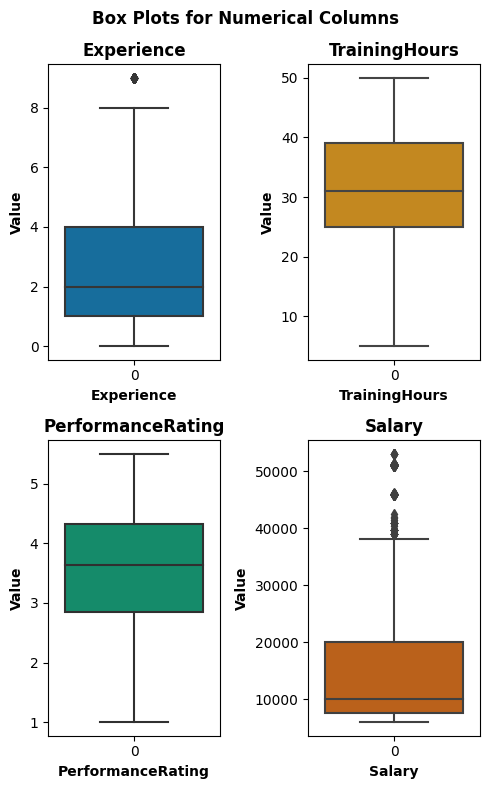

In [10]:
# Box Plots for Numerical Columns
fig, axes_array = plt.subplots(2,2,figsize=(5,8))

axes_list = axes_array.flatten()
color_list = sns.color_palette('colorblind',n_colors=len(numerical_data))
for col, ax, color in zip(numerical_data,axes_list,color_list):
    sns.boxplot(data=employee_data[col],ax=ax,color=color)
    ax.set_title(f"{col}", fontweight='bold')
    ax.set_xlabel(col, fontweight='bold')
    ax.set_ylabel("Value", fontweight='bold')
    
fig.suptitle("Box Plots for Numerical Columns", fontweight='bold')
plt.tight_layout()
plt.show()

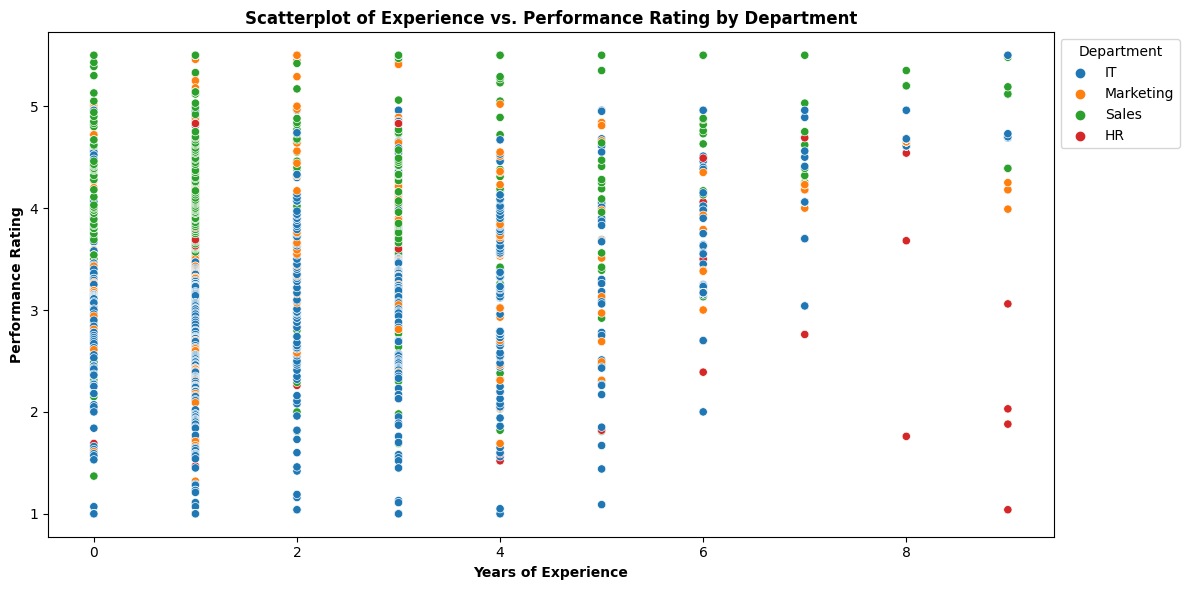

In [11]:
## Multivariate Analysis

# a)Scatterplot for each department
plt.figure(figsize=(12, 6))
sns.scatterplot(data=employee_data, x='Experience', y='PerformanceRating', hue='Department')
plt.title('Scatterplot of Experience vs. Performance Rating by Department', fontweight='bold')
plt.xlabel('Years of Experience', fontweight='bold')
plt.ylabel('Performance Rating', fontweight='bold')
plt.legend(title='Department', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

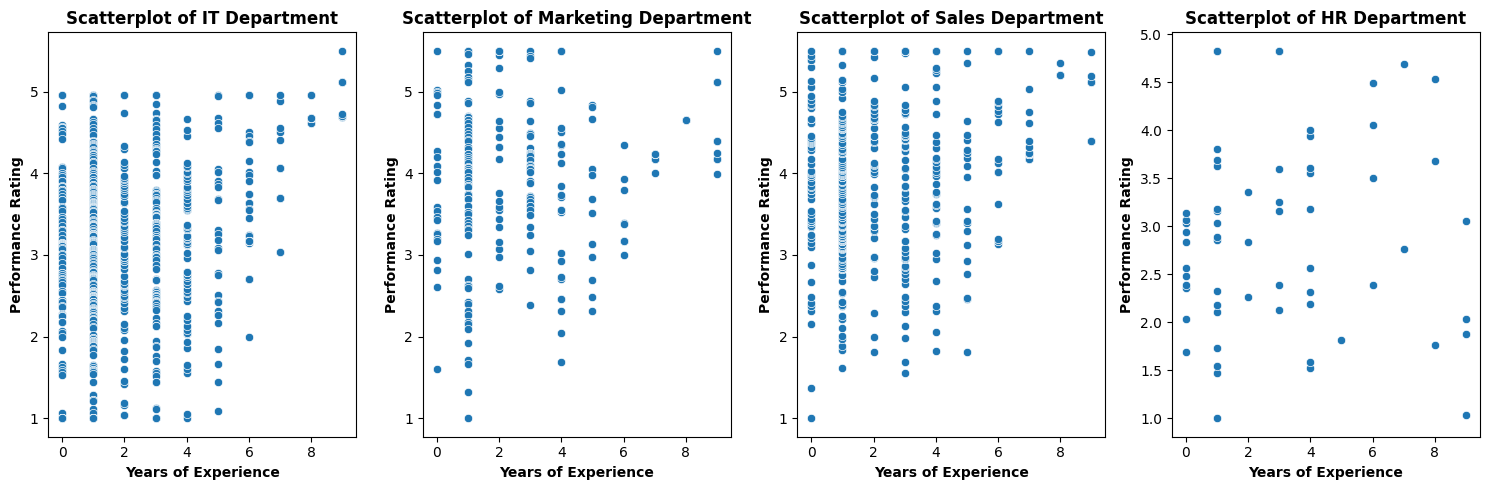

In [12]:
# b)Subplots for each department 
departments = employee_data['Department'].unique()
fig, axes = plt.subplots(nrows=1, ncols=len(departments), figsize=(15, 5))

# Iterate through departments and create scatterplots
for i, department in enumerate(departments):
    ax = axes[i]
    sns.scatterplot(data=employee_data[employee_data['Department'] == department], x='Experience', y='PerformanceRating', ax=ax)
    ax.set_title(f'Scatterplot of {department} Department', fontweight='bold')
    ax.set_xlabel('Years of Experience', fontweight='bold')
    ax.set_ylabel('Performance Rating', fontweight='bold')

plt.tight_layout()
plt.show()

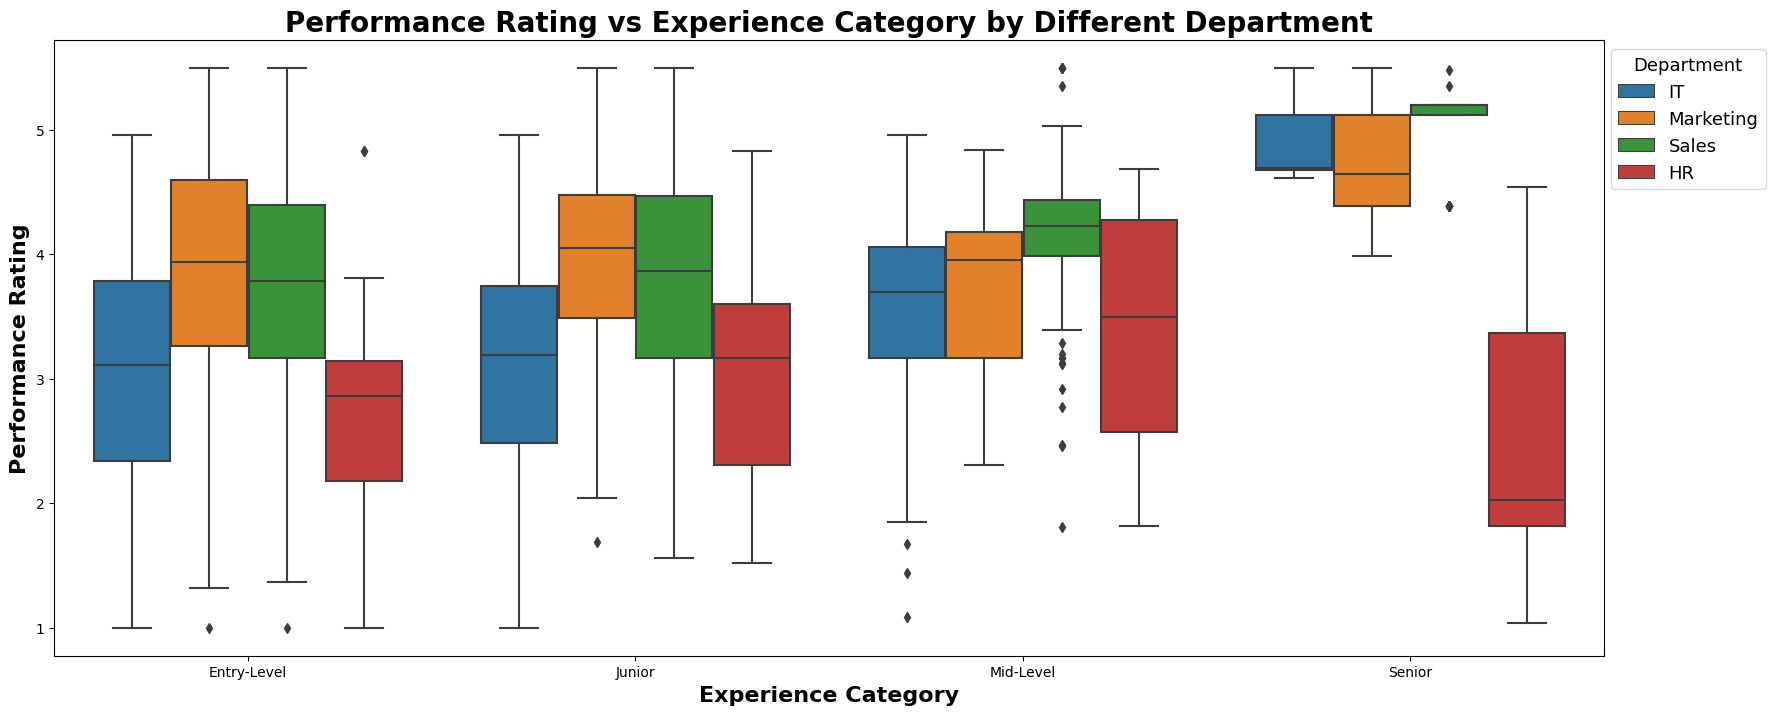

In [13]:
# c)Grouped Box Plot of Performance Rating and Experience by Department

plt.figure(figsize=(20, 8))
sns.boxplot(x=employee_data['Experience-Category'],y=employee_data['PerformanceRating'], hue=employee_data['Department'],)
plt.title('Performance Rating vs Experience Category by Different Department',{'fontsize':20},fontweight='bold')
plt.xlabel('Experience Category',{'fontsize':16},fontweight='bold')
plt.ylabel('Performance Rating',{'fontsize':16},fontweight='bold')
plt.legend(title='Department', loc='upper right', bbox_to_anchor=(1.11,1),title_fontsize=13,fontsize=13)

plt.show()

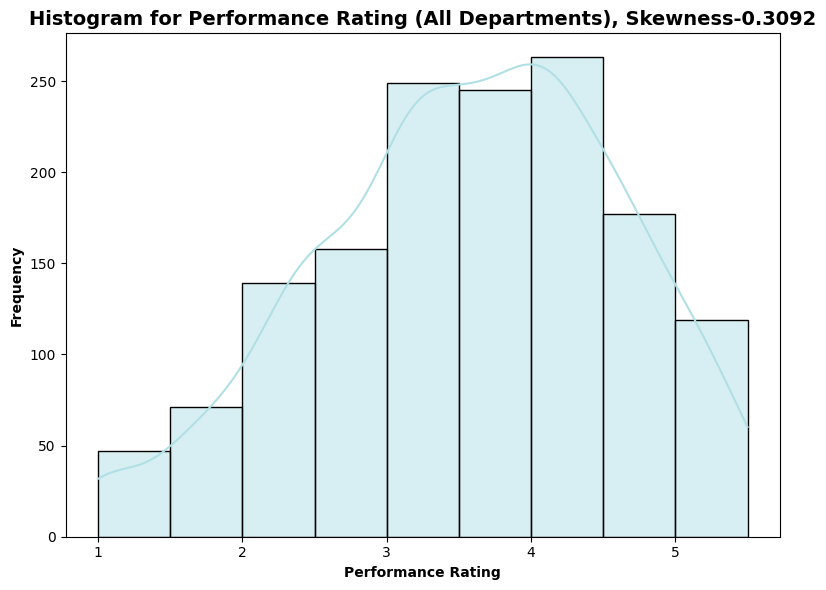

In [14]:
### Task 2: Assumptions, and Hypothesis Formulation
plt.figure(figsize=(8,6))

sns.histplot(data=employee_data, x='PerformanceRating',kde=True,bins=9,color='powderblue')
skewness = stats.skew(employee_data['PerformanceRating'])
plt.title(f"Histogram for Performance Rating (All Departments), Skewness{skewness:.4f}",fontsize=14,fontweight='bold')
plt.xlabel("Performance Rating", fontweight='bold')
plt.ylabel("Frequency", fontweight='bold')
plt.tight_layout()
plt.show()

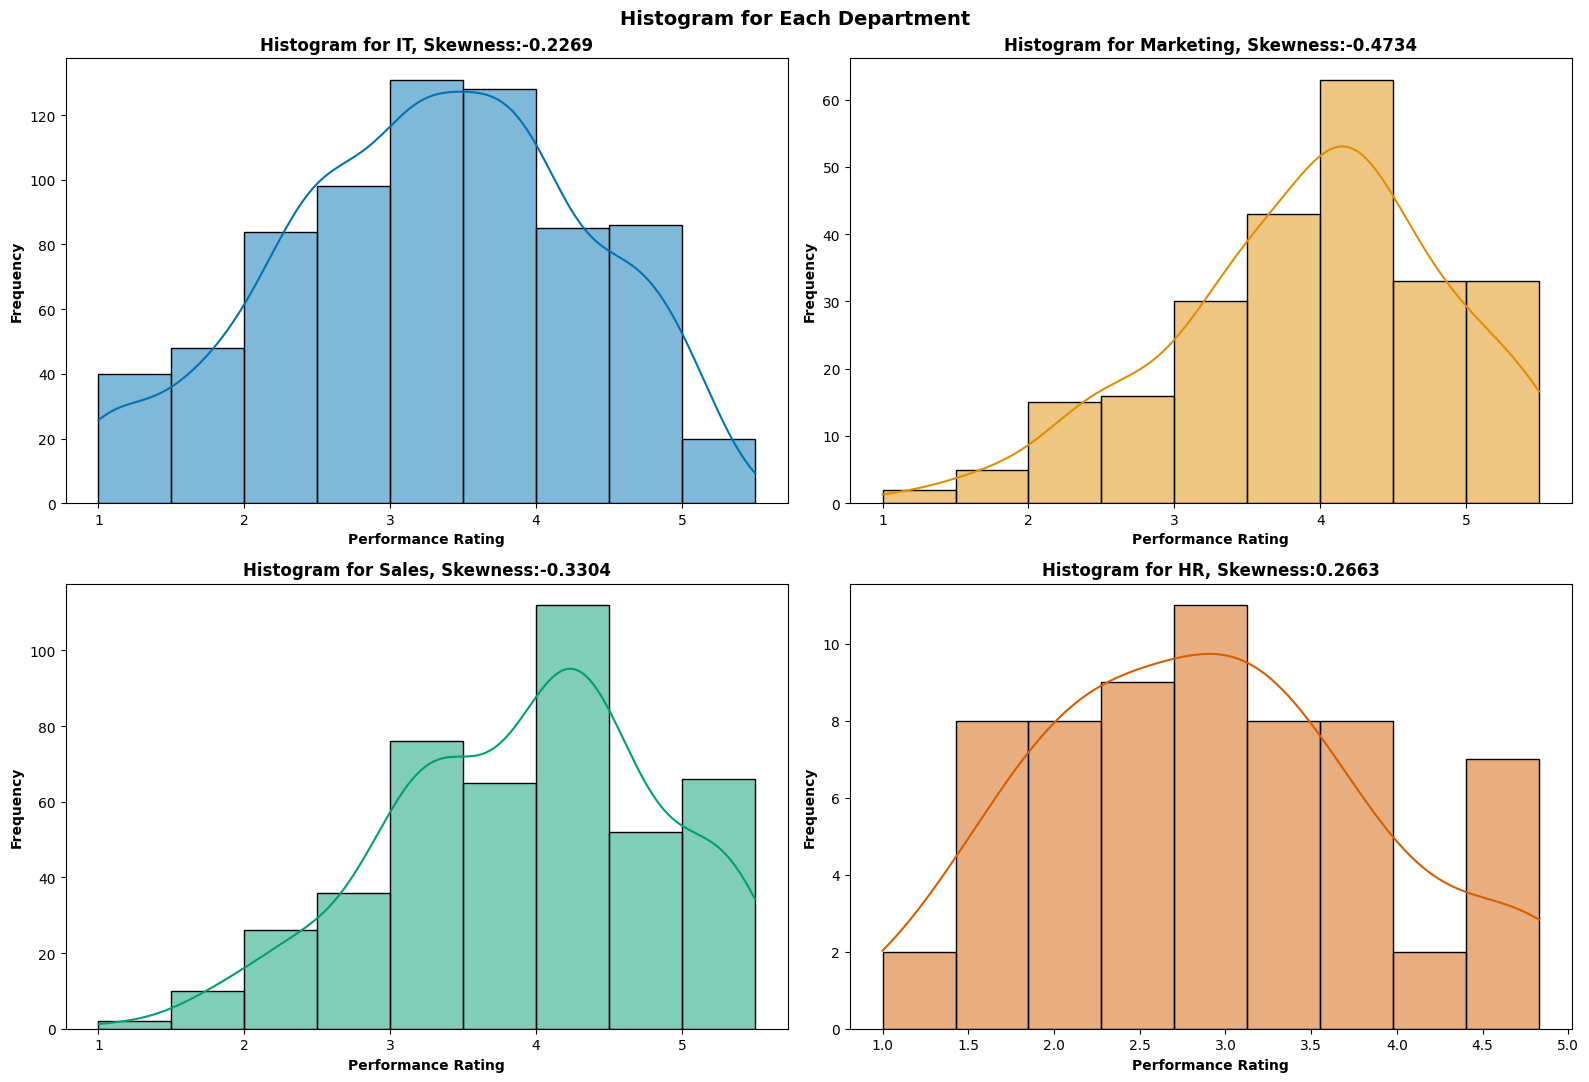

In [15]:
departments = employee_data['Department'].unique()
fig, axes_array = plt.subplots(2,2,figsize=(16,11))
axes_list = axes_array.flatten()
color_list = sns.color_palette('colorblind',n_colors=len(numerical_data))

for dept, ax,color in zip(departments, axes_list, color_list):
    department_data = employee_data[employee_data['Department']==dept]
    sns.histplot(data=department_data,x='PerformanceRating',ax=ax,color=color,kde=True,bins=9)
    skewness = stats.skew(department_data['PerformanceRating'])
    ax.set_title(f"Histogram for {dept}, Skewness:{skewness:.4f}", fontsize=12,fontweight='bold')
    ax.set_xlabel(f"Performance Rating", fontweight='bold')
    ax.set_ylabel("Frequency", fontweight='bold')

fig.suptitle("Histogram for Each Department", fontsize=14,fontweight='bold')
plt.tight_layout()
plt.show()

In [16]:
### Task 3: Statistical Technique: Hypothesis Testing 

# Performing one-way ANOVA on the Performance Raitings of different Departments
grouped_data = [employee_data[employee_data['Department'] == department]['PerformanceRating'] for department in departments]
f_statistic, p_value = stats.f_oneway(*grouped_data)

In [17]:
# Creating a dictionary to store department counts
department_counts = employee_data['Department'].value_counts()
# Printing the department counts
for department, count in department_counts.items():
    print(f"Department {department}: {count} observations")
    
# Defining the significance level (alpha)
alpha = 0.05
       
display(Markdown("**One-way ANOVA Results: (P-Value)**"))
print(f"F-statistic: {f_statistic:.2f}")
print(f"Alpha: {alpha:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpreting the results
alpha = 0.05
if p_value < alpha:
    print("As the p-value is less than the threshold alpha, \ntherefore we have enough statistical evidence to reject the null hypothesis.\nAt least one department's mean perfomance is significantly different from others")
else:
    print("Fail to reject the null hypothesis")

Department IT: 720 observations
Department Sales: 445 observations
Department Marketing: 240 observations
Department HR: 63 observations


**One-way ANOVA Results: (P-Value)**

F-statistic: 61.45
Alpha: 0.05
P-value: 0.0000
As the p-value is less than the threshold alpha, 
therefore we have enough statistical evidence to reject the null hypothesis.
At least one department's mean perfomance is significantly different from others


In [18]:
# Degrees of freedom
df_between = len(departments) - 1
df_within = len(employee_data) - len(departments)

# Calculating the critical F-value based on alpha and degrees of freedom
critical_f_value = stats.f.ppf(1 - alpha, df_between, df_within)

# Displaying the results
display(Markdown("**One-way ANOVA Results: (F-statistic)**"))
print(f"F-statistic: {f_statistic:.2f}")
print(f"Critical F-value: {critical_f_value:.2f}")
print(f"P-value: {p_value:.4f}")

# Comparing F-statistic to the critical F-value and make the decision
if f_statistic > critical_f_value:
    print("As the F-statistic is greater than critical_f_value, \nit means that the test statistic is in the tail of the F-distribution, null hypothesis is rejected\nAt least one department's mean performance is significantly different from others")
else:
    print("Fail to reject the null hypothesis.")

**One-way ANOVA Results: (F-statistic)**

F-statistic: 61.45
Critical F-value: 2.61
P-value: 0.0000
As the F-statistic is greater than critical_f_value, 
it means that the test statistic is in the tail of the F-distribution, null hypothesis is rejected
At least one department's mean performance is significantly different from others


In [19]:
from statsmodels.stats.multicomp import MultiComparison
# Performing Tukey's HSD post hoc test
multicomp = MultiComparison(employee_data['PerformanceRating'], employee_data['Department'])
result = multicomp.tukeyhsd()

# Displaying the results
display(Markdown("**Tukey's HSD Post Hoc Test:**"))
print(result)

**Tukey's HSD Post Hoc Test:**

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
       HR        IT   0.3715 0.0217  0.0384 0.7047   True
       HR Marketing    1.027    0.0  0.6681  1.386   True
       HR     Sales   1.0256    0.0  0.6843 1.3669   True
       IT Marketing   0.6555    0.0  0.4665 0.8445   True
       IT     Sales   0.6541    0.0  0.5012  0.807   True
Marketing     Sales  -0.0014    1.0 -0.2044 0.2017  False
---------------------------------------------------------


In [20]:
"""Part Two: Regression Analysis"""
# Selecting independent variables
X = employee_data[['TrainingHours','Salary','Experience']]
# Dependent variable
y = employee_data['PerformanceRating']

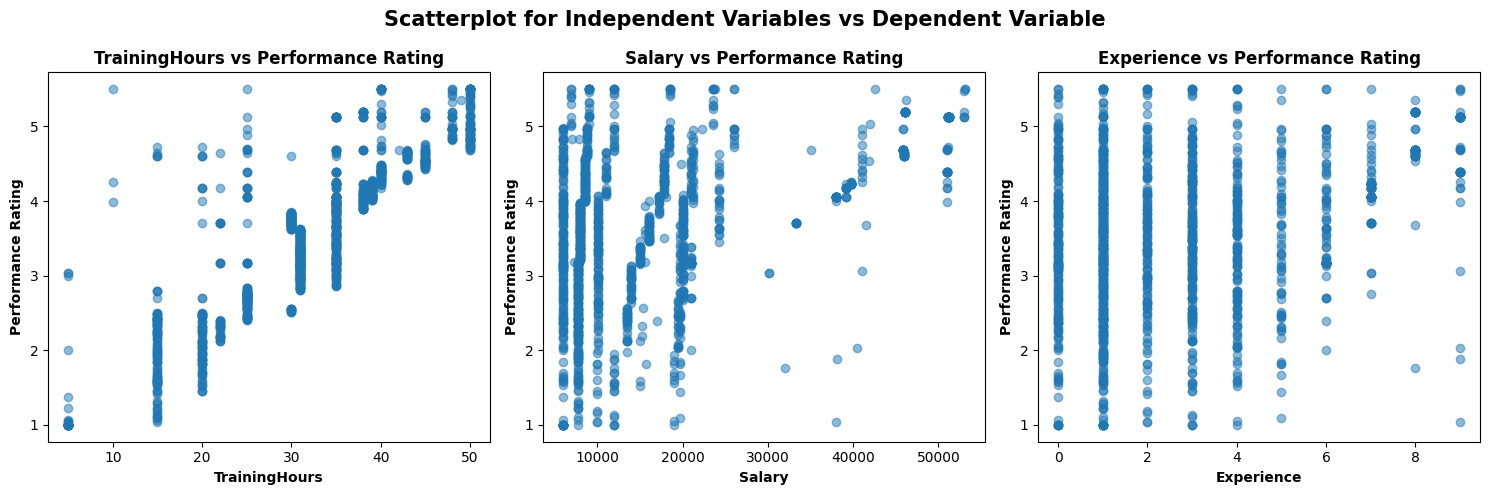

In [21]:
## Checking linerity

# Creating scatterplots for each independent variable against the dependent variable
fig, axes = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(15, 5))

for i, col in enumerate(X.columns):
    axes[i].scatter(X[col], y, alpha=0.5)
    axes[i].set_title(f'{col} vs Performance Rating', fontweight='bold')
    axes[i].set_xlabel((col), fontweight='bold')
    axes[i].set_ylabel('Performance Rating', fontweight='bold')

fig.suptitle("Scatterplot for Independent Variables vs Dependent Variable", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

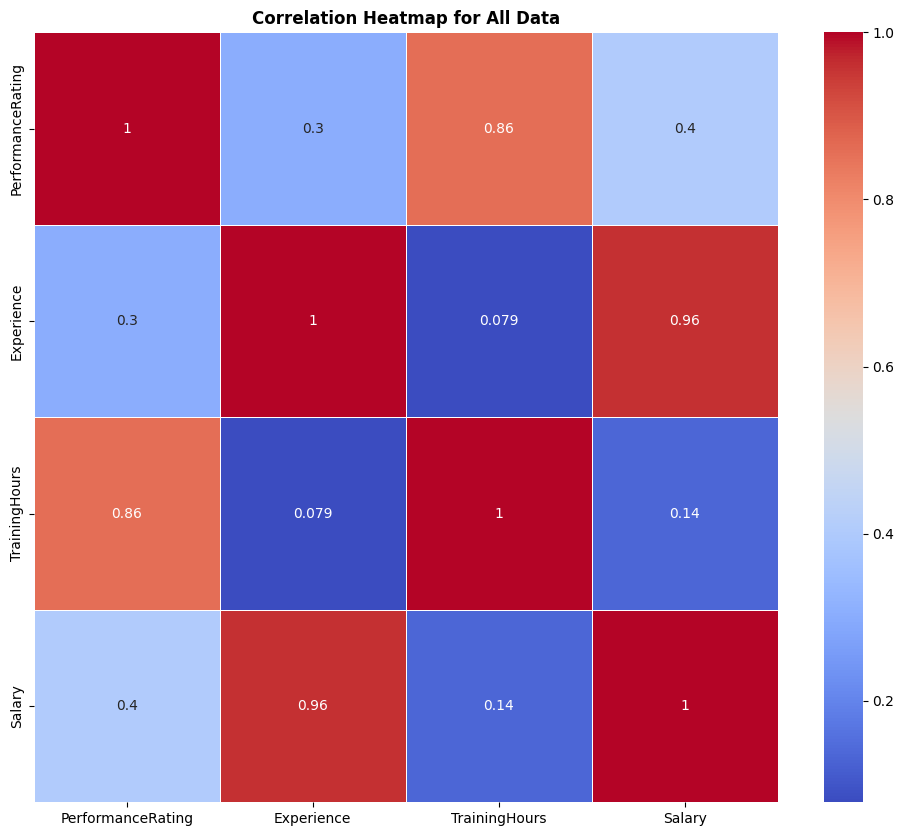

In [22]:
## Checking Multicollinearity

#Calculating a correlation matrix
numerical_columns = employee_data[['PerformanceRating','Experience','TrainingHours','Salary']]
corr_matrix = numerical_columns.corr()

# Creating a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for All Data',fontweight='bold')
plt.show()

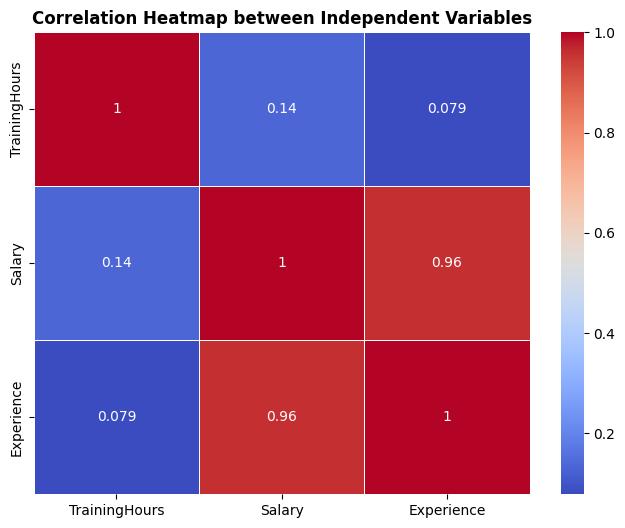

In [23]:
# Checking for multicollinearity using a heatmap
corr_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap between Independent Variables",fontweight='bold')
plt.show()

In [24]:
# Removing independent variable after check multicollinearity
X = employee_data[['TrainingHours','Salary']]

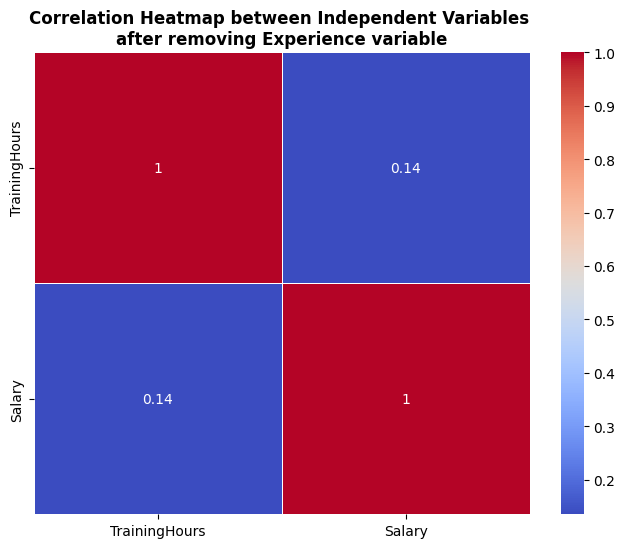

In [25]:
corr_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap between Independent Variables \nafter removing Experience variable",fontweight='bold')
plt.show()

In [26]:
## Regression Test Results

# Selecting final independent variables
X = employee_data[['TrainingHours','Salary']]
# Dependent variable
y = employee_data['PerformanceRating']

# Adding a constant term to the predictor variables
X = sm.add_constant(X)
# Fitting the multiple linear regression model
model = sm.OLS(y, X).fit()
# Displaying the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      PerformanceRating   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     3412.
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        16:57:40   Log-Likelihood:                -874.98
No. Observations:                1468   AIC:                             1756.
Df Residuals:                    1465   BIC:                             1772.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4306      0.040     10.861

In [27]:
# Changing independent variable based on regression result
X_final = employee_data[['TrainingHours','Experience']]

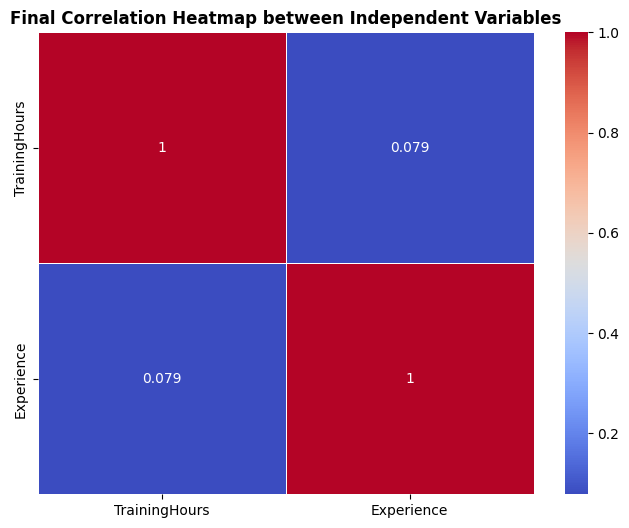

In [28]:
corr_matrix = X_final.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Final Correlation Heatmap between Independent Variables",fontweight='bold')
plt.show()

In [29]:
## Second Regression Test Results

# Selecting final independent variables
X_final = employee_data[['TrainingHours','Experience']]
# Dependent variable
y = employee_data['PerformanceRating']

# Adding a constant term to the predictor variables
X_final = sm.add_constant(X_final)
# Fitting the multiple linear regression model
model = sm.OLS(y, X_final).fit()
# Displaying the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      PerformanceRating   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     2837.
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        16:57:40   Log-Likelihood:                -984.63
No. Observations:                1468   AIC:                             1975.
Df Residuals:                    1465   BIC:                             1991.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4880      0.043     11.446

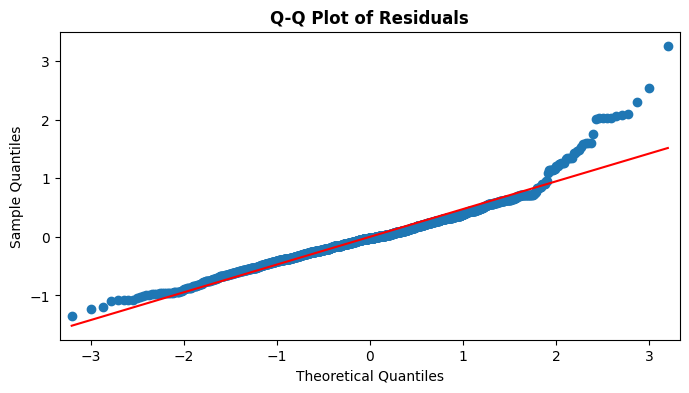

Anderson-Darling Statistic: 10.5854340041451
Critical Values: [0.574 0.654 0.785 0.916 1.089]
Significance Levels: [0.15  0.1   0.05  0.025 0.01 ]


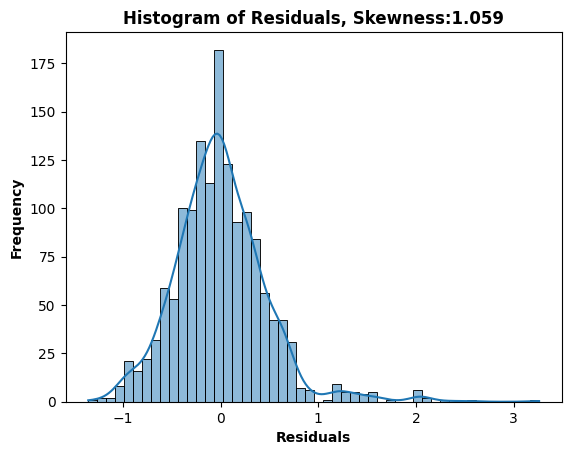

In [30]:
## Residuals

# Getting the residuals
residuals = model.resid

# Residual plot for normality check
# Creating a Q-Q plot to check for normality
fig, ax = plt.subplots(figsize=(8, 4))
sm.qqplot(residuals, line='s', ax=ax)
plt.title("Q-Q Plot of Residuals", fontweight='bold')
plt.show()

# Creating Histogram of Residuals
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals", fontweight='bold')
plt.ylabel("Frequency", fontweight='bold')
skewness = stats.skew(residuals)
plt.title(f"Histogram of Residuals, Skewness:{skewness:.3f}", fontweight='bold')

# Performing the Anderson-Darling test for normality
result = stats.anderson(residuals, dist='norm')

# Extracting the test statistic, critical values, and significance levels
ad_statistic = result.statistic
ad_critical_values = result.critical_values
ad_significance_levels = result.significance_level

print("Anderson-Darling Statistic:", ad_statistic)
print("Critical Values:", ad_critical_values)
print("Significance Levels:", ad_significance_levels / 100)

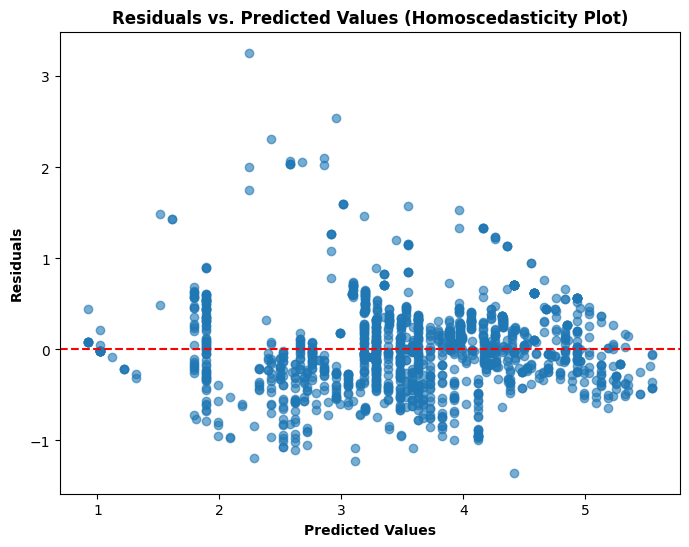

In [31]:
## Homoscedasticity check

# Getting the predicted (fitted) values from the model
predicted_values = model.fittedvalues

# Getting the residuals from the model
residuals = model.resid

# Creating a scatterplot of residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values", fontweight='bold')
plt.ylabel("Residuals", fontweight='bold')
plt.title("Residuals vs. Predicted Values (Homoscedasticity Plot)", fontweight='bold')
plt.show()